In [1]:
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Convolution2D, \
    Flatten, \
    MaxPooling2D, \
    Dense, \
    ZeroPadding2D, \
    Lambda
import keras.backend as K
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical
import numpy as np
from keras.preprocessing import image
from keras.optimizers import Adam
from utils import plots

Using Theano backend.


In [2]:
def set_backend(backend):
    if backend not in ['theano', 'tensorflow']:
        raise Exception('Valid backend not specified')
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend    
        reload(K)
        assert K.backend() == backend

## Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, 1)
x_test = np.expand_dims(x_test, 1)

## Setup Helpers

In [4]:
nx = 28
ny = 28
batch_size = 100

In [7]:
def get_batches(x, y, idg=image.ImageDataGenerator(), batch_size=4, shuffle=True):
    return idg.flow(x, y, batch_size=batch_size, shuffle=shuffle)

In [5]:
def onehot_keras(x):
    return to_categorical(x)

In [6]:
x_mean = np.mean(x_train).astype(np.float32)
x_std = np.std(x_train).astype(np.float32)
def normalize(x):
    return (x - x_mean)/x_std

In [37]:
train_batches = get_batches(x_train, onehot_keras(y_train), batch_size=128)
test_batches = get_batches(x_test, onehot_keras(y_test), batch_size=128)

## Simple Linear Model

In [29]:
lm = Sequential()
lm.add(Flatten(input_shape=(1, 28, 28)))
lm.add(Dense(10, activation='softmax'))

In [31]:
lm.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
lm.fit_generator(train_batches, train_batches.n, nb_epoch=10,
                 validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/10
60000/60000 [==============================] - 9s - loss: 7.8001 - acc: 0.5093 - val_loss: 6.0390 - val_acc: 0.6209
Epoch 2/10
60000/60000 [==============================] - 9s - loss: 6.0437 - acc: 0.6210 - val_loss: 5.9211 - val_acc: 0.6286
Epoch 3/10
60000/60000 [==============================] - 9s - loss: 5.9054 - acc: 0.6305 - val_loss: 5.8201 - val_acc: 0.6361
Epoch 4/10
60000/60000 [==============================] - 9s - loss: 5.8912 - acc: 0.6313 - val_loss: 5.8760 - val_acc: 0.6326
Epoch 5/10
60000/60000 [==============================] - 9s - loss: 5.8391 - acc: 0.6349 - val_loss: 5.9253 - val_acc: 0.6300
Epoch 6/10
60000/60000 [==============================] - 9s - loss: 5.8130 - acc: 0.6371 - val_loss: 5.7111 - val_acc: 0.6430
Epoch 7/10
60000/60000 [==============================] - 9s - loss: 5.7937 - acc: 0.6382 - val_loss: 5.7247 - val_acc: 0.6421
Epoch 8/10
60000/60000 [==============================] - 9s - loss: 5.7579 - acc: 0.6406 - val_loss: 5.7444 - 

## Simple Linear Model with Normalization

In [60]:
lm = Sequential()
lm.add(Lambda(normalize, input_shape=(1, 28, 28), output_shape=(1, 28, 28)))
lm.add(Flatten())
lm.add(Dense(10, activation='softmax'))

In [61]:
lm.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
lm.fit_generator(train_batches, train_batches.n, nb_epoch=10,
                validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/10
60000/60000 [==============================] - 9s - loss: 0.5008 - acc: 0.8524 - val_loss: 0.3124 - val_acc: 0.9118
Epoch 2/10
60000/60000 [==============================] - 9s - loss: 0.3068 - acc: 0.9123 - val_loss: 0.2878 - val_acc: 0.9153
Epoch 3/10
60000/60000 [==============================] - 9s - loss: 0.2879 - acc: 0.9193 - val_loss: 0.2757 - val_acc: 0.9209
Epoch 4/10
60000/60000 [==============================] - 9s - loss: 0.2762 - acc: 0.9216 - val_loss: 0.2754 - val_acc: 0.9205
Epoch 5/10
60000/60000 [==============================] - 9s - loss: 0.2726 - acc: 0.9237 - val_loss: 0.2743 - val_acc: 0.9217
Epoch 6/10
60000/60000 [==============================] - 9s - loss: 0.2697 - acc: 0.9243 - val_loss: 0.2655 - val_acc: 0.9256
Epoch 7/10
60000/60000 [==============================] - 9s - loss: 0.2665 - acc: 0.9260 - val_loss: 0.2716 - val_acc: 0.9234
Epoch 8/10
60000/60000 [==============================] - 9s - loss: 0.2592 - acc: 0.9272 - val_loss: 0.2862 - 

## 2 Layer Linear Model with Normalization (Relu)

In [76]:
lm2 = Sequential([
        Lambda(normalize, input_shape=(1, 28, 28), output_shape=(1, 28, 28)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])

In [77]:
lm2.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
lm2.fit_generator(train_batches, train_batches.n, nb_epoch=1,
                 validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 19s - loss: 0.2082 - acc: 0.9383 - val_loss: 0.1095 - val_acc: 0.9684


In [79]:
lm2.optimizer.lr = 0.1
lm2.fit_generator(train_batches, train_batches.n, nb_epoch=1,
                 validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 19s - loss: 0.0830 - acc: 0.9748 - val_loss: 0.0810 - val_acc: 0.9761


## 2 Layer Linear Model with Normalization (Softmax)

In [82]:
lm3 = Sequential([
        Lambda(normalize, input_shape=(1, 28, 28), output_shape=(1, 28, 28)),
        Flatten(),
        Dense(512, activation='softmax'),
        Dense(10, activation='softmax')
    ])

In [83]:
lm3.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
lm3.fit_generator(train_batches, train_batches.n, nb_epoch=1,
                 validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 20s - loss: 1.8323 - acc: 0.8200 - val_loss: 1.4734 - val_acc: 0.8447


In [87]:
lm3.optimizer.lr = 0.1
lm3.fit_generator(train_batches, train_batches.n, nb_epoch=3,
                 validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 20s - loss: 1.2251 - acc: 0.8487 - val_loss: 1.0058 - val_acc: 0.8507


## Basic VGG style CNN

In [90]:
vgg = Sequential([
        Lambda(normalize, input_shape=(1, 28, 28), output_shape=(1, 28, 28)),
        Convolution2D(nb_filter=128, nb_row=3, nb_col=3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Convolution2D(nb_filter=256, nb_row=3, nb_col=3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Convolution2D(nb_filter=512, nb_row=3, nb_col=3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])

In [91]:
vgg.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg.fit_generator(train_batches, train_batches.n, nb_epoch=1,
                 validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/1
60000/60000 [==============================] - 2366s - loss: 0.1601 - acc: 0.9475 - val_loss: 0.0529 - val_acc: 0.9830


## Check Data Augmentation

In [112]:
chk_gen = image.ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.15)
chk_iter = chk_gen.flow(np.expand_dims(x_train[0], 0))

In [114]:
aug_imgs = [next(chk_iter)[0] for i in range(8)]

In [140]:
aug_imgs[0].shape

(1, 28, 28)

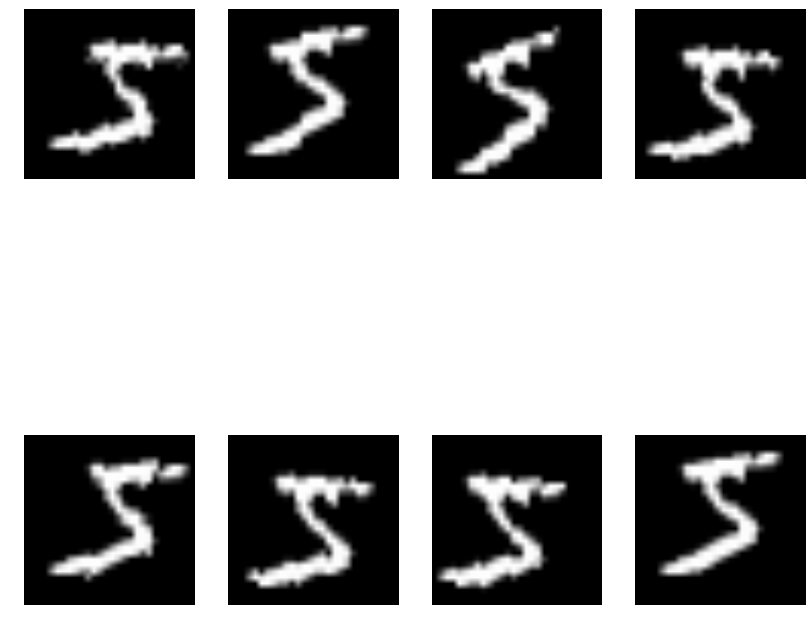

In [144]:
f = plt.figure(figsize=(14, 14))
for i in range(len(aug_imgs)):
    sp = f.add_subplot(2, 4, i + 1)
    sp.axis('Off')
    plt.imshow(aug_imgs[i][0, :, :], cmap='gray')

## VGG with Data Augmentation

In [154]:
aug_train_batches = image.ImageDataGenerator(rotation_range=10,
                                         width_shift_range=0.1,
                                         height_shift_range=0.1,
                                         shear_range=0.15).flow(x_train, onehot_keras(y_train), 
                                                                batch_size=128, shuffle=True,)
aug_test_batches = image.ImageDataGenerator(rotation_range=10,
                                           width_shift_range=0.1,
                                           height_shift_range=0.1,
                                           shear_range=0.15).flow(x_test, onehot_keras(y_test), 
                                                                  batch_size=128, shuffle=True)

In [155]:
vgg1 = Sequential([
        Lambda(normalize, input_shape=(1, 28, 28), output_shape=(1, 28, 28)),
        Convolution2D(nb_filter=128, nb_row=3, nb_col=3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Convolution2D(nb_filter=256, nb_row=3, nb_col=3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Convolution2D(nb_filter=512, nb_row=3, nb_col=3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])

In [156]:
vgg1.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg1.fit_generator(aug_train_batches, aug_train_batches.n, nb_epoch=1,
                  validation_data=aug_test_batches, nb_val_samples=aug_test_batches.n)

Epoch 1/1
 5120/60000 [=>............................] - ETA: 2047s - loss: 1.0654 - acc: 0.6432

In [ ]:
vgg1.summary()